In [1]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
bbh_text = np.genfromtxt("/home/daniel/repositories/heron/data/bbh_mass1_only_hp_3D.txt", delimiter=" ")
bbh_test = np.genfromtxt("/home/daniel/repositories/heron/data/bbh_mass1_only_hp_3D_TEST.txt", delimiter=" ")

In [3]:
bbh = data.Data(bbh_text[:,:3], bbh_text[:,-1],              
                    target_names = ["Times", "Mass", "Spin"],
                    label_names = ["hp strain"],
                    test_size = 0,
                    test_targets = bbh_test[:,:3],
                    test_labels = bbh_test[:,-1]
                    )

In [4]:
from heron import regression
from heron import kernels

In [5]:
x0 = [(1/np.std(bbh.labels))**2, 50, 10, 10]
gp = regression.Regressor(bbh, kernel=kernels.SquaredExponential(ndim=3), yerror = 1e-23, tikh=1e-6)
gp.set_hyperparameters(x0)

-5070.1231432724007

In [14]:
#x0 = [ 32.57270317,  48.53372059,   5.16764146, ]
#x0 = [0.029974254529549851,  101.2117402 ,    0.84988828]
#gp.set_hyperparameters(x0)

ValueError: operands could not be broadcast together with shapes (3,) (1,2) 

In [6]:
x0 = [ 24.95395191,  21.95756258,  -2.07481906, -13.40978644]
#x0 = [0.029974254529549851,  101.2117402 ,    0.84988828]
gp.set_hyperparameters(x0)

1621.3494888554471

In [17]:
gp.optimise()

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


      fun: -1621.3494888554471
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.09946606,  8.28764859,  7.00425157, -3.6638953 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 42
      nit: 0
     njev: 32
   status: 2
  success: False
        x: array([ 24.95395191,  21.95756258,  -2.07481906, -13.40978644])

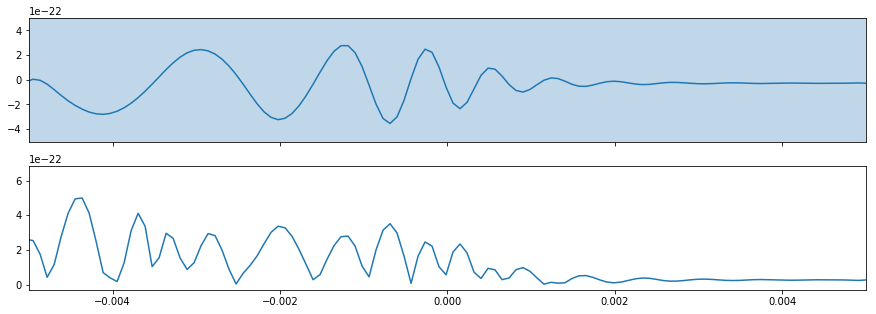

In [35]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_5d85_S0d25.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))
test_point = 0
t = np.linspace(-0.02,0.005,300)
new_point = np.zeros((300,3))
new_point[:,1] = 7
new_point[:,2] = 0.01
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.005, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
#ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

ValueError: operands could not be broadcast together with shapes (300,2) (3,) 

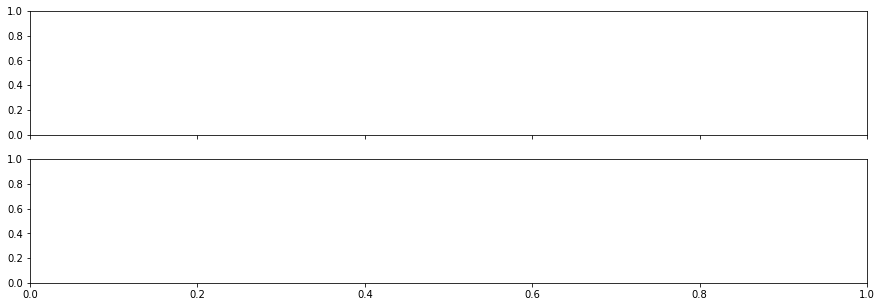

In [84]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_5d20.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))

t = np.linspace(-0.02,0.005,300)
new_point = np.zeros((300,2))
new_point[:,1] = 5.20
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.02, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

In [7]:
from heron import acquisition

In [8]:
x0 = [0, 9.5, 0]
gp.expected_improvement(x0)

array([ -5.56754334e-23])

In [9]:
from scipy.optimize import minimize

In [10]:
t = np.linspace(-0.02,0.001,300)
new_point = np.zeros((300,2))
new_point[:,1] = 5.20
new_point[:,0] = t

In [11]:
EI = map(gp.expected_improvement, new_point)

IndexError: index 2 is out of bounds for axis 0 with size 2

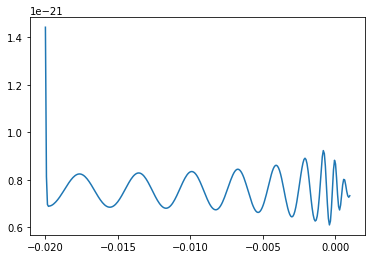

In [29]:
plt.plot(t, EI)

In [12]:
import lalsimulation, lal

def generate_new_points(mass1, spin1x):

    chi1_l = 0
    chi2_l = 0
    chip = 0
    thetaJ = 0
    m1 = mass1
    distance = 5 * lal.PC_SI
    alpha0 = 0
    phic = 0
    f_ref = 100 * lal.HertzUnit,
    waveflags = lalsimulation.SimInspiralCreateWaveformFlags()
    approximant = lalsimulation.SimInspiralGetApproximantFromString("IMRPhenomP")
    #phorder = lalsimulation.SimInspiralGetOrderFromString("IMRPhenomP0")
    #f, ax = plt.subplots(10, sharey=True, figsize=(5,15))
    data = np.zeros((150, 4))
    mass1 = mass1 * lal.MSUN_SI
    coaphase = 0
    mass2 = 6 * lal.MSUN_SI
    spin1x, spin1y, spin1z = spin1x,0,0
    spin2x, spin2y, spin2z = 1,0,0
    flower = 10 
    fref = 10
    distance = 400 *1e6 * lal.PC_SI
    z = 0.0
    inclination = 0.0
    lambda1 = lambda2 = 0.0
    amporder = 0
    phorder = 0
    dt = 0.0002
    hp, hc = lalsimulation.SimInspiralTD(coaphase, dt, 
                                         mass1, mass2,
                                         spin1x, spin1y, spin1z,
                                         spin2x, spin2y, spin2z,
                                         flower, fref, distance, z,
                                            inclination, lambda1, lambda2,
                                             waveflags, None, amporder, phorder,
                                         approximant
                                        )
    times = np.linspace(0, len(hp.data.data)*hp.deltaT, len(hp.data.data)) + hp.epoch
    data[:,-1] =  hp.data.data[(-0.02<times) & (times<0.01)]
    data[:,0] = times[(-0.02<times) & (times<0.01)]
    data[:,1] = m1 * np.ones(150)
    data[:,2] = spin1x * np.ones(150)
    return data

In [15]:
from scipy.optimize import minimize
def infill(number):
    for i in range(number):
        new = minimize(gp.nei, x0, method='nelder-mead',)
        target = bbh.denormalise(new.x, "target")
        print new.x
        new_data = generate_new_points(target[1], target[2])
        gp.add_data(new_data[0,:3], new_data[0,-1])
        gp.optimise()

In [16]:
infill(3)

[-0.00919227  8.36094072  0.05187752]


/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[ 0.   9.5  0. ]
[ 0.   9.5  0. ]


In [18]:
gp.loglikelihood()

1623.9726014742296

In [20]:
gp.correlation()

0.010902683793309543

In [21]:
gp.prediction(np.atleast_2d(x0))

(array([ -2.92125616e-22]), array([[ -4.04570176e-22]]))

In [31]:
gp.expected_improvement([-0.015, 5.6])

0.0

In [32]:
y_min = gp.training_y.min()

In [36]:
x0 = [0, 9.5]
p, S = gp.prediction(np.atleast_2d(x0))

In [37]:
EI_one = ((y_min - p) * (0.5 + 0.5*m.erf((
          1./np.sqrt(2.))*((y_min - p) /
                           S))))
EI_two = ((S * (1. / np.sqrt(2. * np.pi))) * (np.exp(-(1./2.) *
                                                     ((y_min - p)**2. / S**2.))))
EI = EI_one + EI_two

In [38]:
EI

array([[ -8.87879249e-23]])

In [39]:
S

array([[ -3.66082381e-22]])